In [1]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
wells = []
##global scope variable for the path to where all the well data is stored
_PATH = "data/"

In [2]:
class Well:
    ##This is a well class that will hold all the properties of a well
    ##and also will be able to do relevant calculations for a given well
    
    ##Once the data is set in the constructor, please do not change the values when they are accessed.
    ##Apparently I can't prevent this in Python, but I can at least advise against it.
    
    def __init__(self, easting, northing, porosity, permeability, PR, YM, wSaturation, oSaturation, thickness, proppant,
                 pumpRate, name, RF, Pa, FVF, oilByMonth, waterByMonth):
        self.easting = easting ##easting
        self.northing = northing ##northing
        self.porosity = porosity ##porosity
        self.permeability = permeability ##permeability
        self.PR = PR ##poissons's ratio
        self.YM = YM ##young's modulus
        self.wSaturation = wSaturation ##water saturation
        self.oSaturation = oSaturation ##oil saturation
        self.thickness = thickness ##thickness
        self.proppant = proppant ##proppant weight
        self.pumpRate = pumpRate ##pumpRate
        self.name = name ##name
        self.RF = RF ##recovery factor
        self.Pa = Pa ##average pressure
        self.FVF = FVF ##formation volume factor
        self.oilByMonth = oilByMonth ##oil produced in each month
        self.waterByMonth = waterByMonth ##water produced in each month

    
    ##returns the length of the well
    def getWellLength(self):
        return self.easting.max()-self.easting.min()
    
    #returns the total oil produced by the well
    def getTotalProduction(self):
        return self.oilByMonth.sum()
    
    ##returns the oil in place for this given well
    def getOilInPlace(self):
        return ((7758 * 360 * self.thickness * self.porosity * (1 - self.wSaturation)) / self.FVF)
    
    ##returns the recoverable reserves of this well
    def getRecoverableReserves():
        return (getOriginalOilPlace() * RF)
    
    ##returns rate of initial production for this well
    def getROIP():
        pass 
    
    ##returns the life of this reservoir
    def getLR():
        pass
    
    ##returns the cumulative production of this well
    def getCP():
        pass
    
    ##this is the kind of functioning as a toString right now, almost no reason for it
    def getName(self):
        return self.name
    
    ##method to return oil produced in a given month
    def getOilAtMonth(self, n):
        if n > 12 or n < 1:
            ##bad
            return -1
        else:
            return self.oilByMonth[n]
    
    ##method to return water produced in a given month
    def getOilAtMonth(self, n):
        if n > 12 or n < 1:
            ##bad
            return -1
        else:
            return self.waterByMonth[n]
    
    ##method to display data for this well
    ##depth will be for getiing data at a given depth in a well. Not sure if or when I should implement this
    def displayData(self, depth = 0):
        if depth == 0:
            data = pd.read_csv(_PATH + self.name + ".csv")
        else:
            data = pd.read_csv(_PATH + self.name + ".csv")
            
        print("Displaying data for: " + self.name)
        print(data)

In [3]:
##method to take the data given, create a well object and store it in wells
def createWells():
    wellProduction = pd.read_csv(_PATH + "well production.csv")
    for i in range(100):
    ##for every well
        ##get all the data from the well production csv
        name = wellProduction.at[i, "well name"]
        ap = wellProduction.at[i, "average pressure (Pa)"]
        RF = wellProduction.at[i, "recovery factor"]
        FVF = wellProduction.at[i, "formation volume factor"]
        oil = wellProduction.iloc[i, 4:16] ##oil per month
        water = wellProduction.iloc[i, 16:28] ##water per month
        ##now that we have the name of the well, we can use that to access its
        ##own csv file and get that data
        wellDF = pd.read_csv(_PATH + name + ".csv")
        e = wellDF["easting"]
        n = wellDF["northing"]
        p = wellDF["porosity"]
        perm = wellDF["permeability"]
        pr = wellDF["Poisson's ratio"]
        ym = wellDF["Young's Modulus"]
        ws = wellDF["water saturation"]
        os = wellDF["oil saturation"]
        thick = wellDF["thickness (ft)"]
        prop = wellDF["proppant weight (lbs)"]
        pump = wellDF["pump rate (cubic feet/min)"]
        ##create a new well
        temp = Well(e, n, p, perm, pr, ym, ws, os, thick, prop, pump, name, RF, ap, FVF, oil, water)
        ##append the new well to the list
        wells.append(temp)
        

In [4]:
createWells()

In [5]:
#histogram of well length

(array([ 1.,  2.,  6., 12., 26., 22., 16., 11.,  3.,  1.]),
 array([ 1590. ,  2765.4,  3940.8,  5116.2,  6291.6,  7467. ,  8642.4,
         9817.8, 10993.2, 12168.6, 13344. ]),
 <a list of 10 Patch objects>)

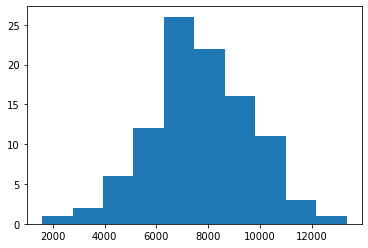

In [6]:
lengths = []
for well in wells:
    lengths.append(well.getWellLength())
plt.hist(lengths)

In [53]:
#data for all
easting = []
northing = []
depth = []
production = []
eastingMax = []
northingMax = []
proppant = []
pumpRate = []
for well in wells:
    easting.append(well.easting)
    northing.append(well.northing)
    depth.append(well.thickness)
    production.append(well.getTotalProduction())
    eastingMax.append(well.easting.max())
    northingMax.append(well.northing.max())
    proppant.append(well.proppant)
    pumpRate.append(well.pumpRate)

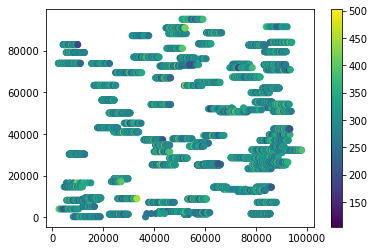

In [54]:
plt.scatter(easting, northing, c = pumpRate)
plt.colorbar()

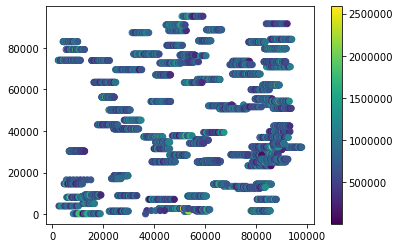

In [55]:
plt.scatter(easting, northing, c = proppant)
plt.colorbar()

In [7]:
#narrow wells
narrowedWells = []
for well in wells:
    if well.easting.min() > 50000 and well.northing.max() < 40000:
        narrowedWells.append(well)


In [50]:
#plot new isolated wells
easting = []
northing = []
depth = []
production = []
eastingMax = []
northingMax = []
proppant = []
pumpRate = []
for well in narrowedWells:
    easting.append(well.easting)
    northing.append(well.northing)
    depth.append(well.thickness)
    production.append(well.getTotalProduction())
    eastingMax.append(well.easting.max())
    northingMax.append(well.northing.max())
    proppant.append(well.proppant)
    pumpRate.append(well.pumpRate)

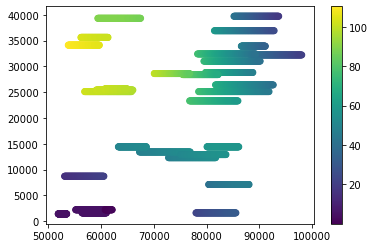

In [47]:
plt.scatter(easting, northing, c = depth)
plt.colorbar()

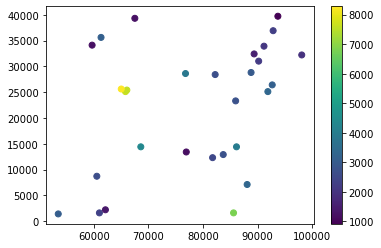

In [48]:
plt.scatter(eastingMax, northingMax, c = production)
plt.colorbar()

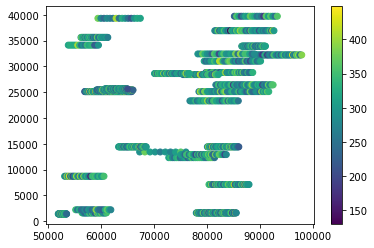

In [52]:
plt.scatter(easting, northing, c = pumpRate)
plt.colorbar()